In [1]:
import math
import random 
import collections
import numpy as np

import nest_asyncio
import tensorflow as tf
import tensorflow_federated as tff
import seaborn as sns

from tensorflow.keras import activations
from statistics import mean
from collections import Counter

from tqdm.notebook import tqdm as tqdm_notebook

import seaborn as sns
from matplotlib import pyplot as plt

from math import sqrt

sns.set_theme(style= 'whitegrid')
nest_asyncio.apply()
tff.backends.reference.set_reference_context()

### Data augmentation

In [2]:
from random import randint, choice, shuffle
from math import ceil
from itertools import chain

In [3]:
feature_space = {
'class1':[ range(randint(0, 15),randint(1000, 2000)),
              range(randint(10, 25),randint(2000, 3000)),
              range(randint(20, 35),randint(3000, 4000)),
              range(randint(30, 45),randint(4000, 5000)),
              range(randint(40, 55),randint(5000, 6000)),
              range(randint(50, 65),randint(6000, 7000)),
              range(randint(60, 75),randint(7000, 8000)),
              range(randint(70, 85),randint(8000, 9000)),
              range(randint(80, 95),randint(9000, 10000)),
              range(randint(90, 105),randint(10000, 11000))],
    
 'class2':[range(randint(10, 25),randint(1500, 2500)),
              range(randint(20, 35),randint(2500, 3500)),
              range(randint(30, 45),randint(3500, 4500)),
              range(randint(40, 55),randint(4500, 5500)),
              range(randint(50, 65),randint(5500, 6500)),
              range(randint(60, 75),randint(6500, 7500)),
              range(randint(70, 85),randint(7500, 8500)),
              range(randint(80, 95),randint(8500, 9500)),
              range(randint(90, 105),randint(9500, 10500)),
              range(randint(100, 115),randint(10500, 11500))],
    
    
'class3':[range(randint(20, 35),randint(2000, 3000)),
              range(randint(30, 45),randint(3000, 4000)),
              range(randint(40, 55),randint(4000, 5000)),
              range(randint(50, 65),randint(5000, 6000)),
              range(randint(60, 75),randint(6000, 7000)),
              range(randint(70, 85),randint(7000, 8000)),
              range(randint(80, 95),randint(8000, 90000)),
              range(randint(90, 105),randint(9000, 10000)),
              range(randint(100, 115),randint(10000, 11000)),
              range(randint(110, 125),randint(11000, 12000))],
    
'class4':[range(randint(30, 45),randint(2500, 3500)),
              range(randint(40, 55),randint(3500, 4500)),
              range(randint(50, 65),randint(4500, 5500)),
              range(randint(60, 75),randint(5500, 6500)),
              range(randint(70, 85),randint(6500, 7500)),
              range(randint(80, 95),randint(7500, 8500)),
              range(randint(90, 105),randint(8500, 9500)),
              range(randint(100, 115),randint(9500, 10500)),
              range(randint(110, 125),randint(10500, 11500)),
              range(randint(120, 135),randint(11500, 12500))],
    
'class5':[range(randint(40, 55),randint(3000, 4000)),
              range(randint(50, 65),randint(4000, 5000)),
              range(randint(60, 75),randint(5000, 6000)),
              range(randint(70, 85),randint(6000, 7000)),
              range(randint(80, 95),randint(7000, 8000)),
              range(randint(90, 105),randint(8000, 9000)),
              range(randint(100, 115),randint(9000, 10000)),
              range(randint(110, 125),randint(10000, 11000)),
              range(randint(120, 135),randint(11000, 12000)),
              range(randint(130, 145),randint(12000, 13000))],
    
'class6':[range(randint(50, 65),randint(3500, 4500)),
              range(randint(60, 75),randint(4500, 5500)),
              range(randint(70, 85),randint(5500, 6500)),
              range(randint(80, 95),randint(6500, 7500)),
              range(randint(90, 105),randint(7500, 8500)),
              range(randint(100, 115),randint(8500, 9500)),
              range(randint(110, 125),randint(9500, 10500)),
              range(randint(120, 135),randint(10500, 11500)),
              range(randint(130, 145),randint(11500, 12500)),
              range(randint(140, 155),randint(12500, 13500))],
    
'class7':[range(randint(60, 75),randint(4000, 5000)),
              range(randint(70, 85),randint(5000, 6000)),
              range(randint(80, 95),randint(6000, 7000)),
              range(randint(90, 105),randint(7000, 8000)),
              range(randint(100, 115),randint(8000, 9000)),
              range(randint(110, 125),randint(9000, 10000)),
              range(randint(120, 135),randint(10000, 11000)),
              range(randint(130, 145),randint(11000, 12000)),
              range(randint(140, 155),randint(12000, 13000)),
              range(randint(150, 165),randint(13000, 14000))],
    
'class8':[range(randint(70, 85),randint(4500, 5500)),
              range(randint(80, 95),randint(5500, 6500)),
              range(randint(90, 105),randint(6500, 7500)),
              range(randint(100, 115),randint(7500, 8500)),
              range(randint(110, 125),randint(8500, 9500)),
              range(randint(120, 135),randint(9500, 10500)),
              range(randint(130, 145),randint(10500, 11500)),
              range(randint(140, 155),randint(11500, 12500)),
              range(randint(150, 165),randint(12500, 13500)),
              range(randint(160, 175),randint(13500, 14500))],
    
'class9':[range(randint(80, 95),randint(5000, 6000)),
              range(randint(90, 105),randint(6000, 7000)),
              range(randint(100, 115),randint(7000, 8000)),
              range(randint(110, 125),randint(8000, 9000)),
              range(randint(120, 135),randint(9000, 10000)),
              range(randint(130, 145),randint(10000, 11000)),
              range(randint(140, 155),randint(11000, 12000)),
              range(randint(150, 165),randint(12000, 13000)),
              range(randint(160, 175),randint(13000, 14000)),
              range(randint(170, 185),randint(14000, 15000))],
    
'class10':[range(randint(90, 105),randint(5500, 6500)),
              range(randint(100, 115),randint(6500, 7500)),
              range(randint(110, 125),randint(7500, 8500)),
              range(randint(120, 135),randint(8500, 9500)),
              range(randint(130, 145),randint(9500, 10500)),
              range(randint(140, 155),randint(10500, 11500)),
              range(randint(150, 165),randint(11500, 12500)),
              range(randint(160, 175),randint(12500, 13500)),
              range(randint(170, 185),randint(13500, 14500)),
              range(randint(180, 195),randint(14500, 15500))],
    
}

def datapicker(fs, numodpoints):
    data = {}
    for i in fs:
        temp = []
        for ii in range(numodpoints):
            point = []
            for iii in fs.get(i):
                point.append(choice(iii))
            temp.append(point)
        data[i]=temp
    return data

In [4]:
DATAPOINTS = 10000
data = datapicker(feature_space,DATAPOINTS)

In [5]:
#Normalize columns of pandas data frame
# data = data.iloc[:,:].apply(lambda x: x/x.max(), axis=0)

In [6]:
# data.head(1)

In [7]:
def convert(lst,cls):
    LIST = lst[:]
    LIST.append(int(cls[-1:]))
    return LIST

In [8]:
def newDATA(data):
    return(list(map(lambda x:x+[1],data.get('class1'))),
           list(map(lambda x:x+[2],data.get('class2'))),
           list(map(lambda x:x+[3],data.get('class3'))),
           list(map(lambda x:x+[4],data.get('class4'))),
           list(map(lambda x:x+[5],data.get('class5'))),
           list(map(lambda x:x+[6],data.get('class6'))),
           list(map(lambda x:x+[7],data.get('class7'))),
           list(map(lambda x:x+[8],data.get('class8'))),
           list(map(lambda x:x+[9],data.get('class9'))),
           list(map(lambda x:x+[10],data.get('class10')))
          )

In [9]:
from random import randint
from math import ceil

In [10]:
def createClientsDATA(data):
    class1 = data.get('class1')
    class2 = data.get('class2')
    class3 = data.get('class3')
    class4 = data.get('class4')
    class5 = data.get('class5')
    class6 = data.get('class6')
    class7 = data.get('class7')
    class8 = data.get('class8')
    class9 = data.get('class9')
    class10 = data.get('class10')


    class1_1, class1_2, class1_3, class1_4, class1_5, class1_6, class1_7, class1_8, class1_9, class1_10 = [class1[:6400],class1[6400:6800],class1[6800:7200],class1[7200:7600],class1[7600:8000],class1[8000:8400],class1[8400:8800],class1[8800:9200],class1[9200:9600], class1[9600:]]
    class2_1, class2_2, class2_3, class2_4, class2_5, class2_6, class2_7, class2_8, class2_9, class2_10 = [class2[:6400],class2[6400:6800],class2[6800:7200],class2[7200:7600],class2[7600:8000],class2[8000:8400],class2[8400:8800],class2[8800:9200],class2[9200:9600], class2[9600:]]
    class3_1, class3_2, class3_3, class3_4, class3_5, class3_6, class3_7, class3_8, class3_9, class3_10 = [class3[:6400],class3[6400:6800],class3[6800:7200],class3[7200:7600],class3[7600:8000],class3[8000:8400],class3[8400:8800],class3[8800:9200],class3[9200:9600], class3[9600:]]
    class4_1, class4_2, class4_3, class4_4, class4_5, class4_6, class4_7, class4_8, class4_9, class4_10 = [class4[:6400],class4[6400:6800],class4[6800:7200],class4[7200:7600],class4[7600:8000],class4[8000:8400],class4[8400:8800],class4[8800:9200],class4[9200:9600], class4[9600:]]
    class5_1, class5_2, class5_3, class5_4, class5_5, class5_6, class5_7, class5_8, class5_9, class5_10 = [class5[:6400],class5[6400:6800],class5[6800:7200],class5[7200:7600],class5[7600:8000],class5[8000:8400],class5[8400:8800],class5[8800:9200],class5[9200:9600], class5[9600:]]
    class6_1, class6_2, class6_3, class6_4, class6_5, class6_6, class6_7, class6_8, class6_9, class6_10 = [class6[:6400],class6[6400:6800],class6[6800:7200],class6[7200:7600],class6[7600:8000],class6[8000:8400],class6[8400:8800],class6[8800:9200],class6[9200:9600], class6[9600:]]
    class7_1, class7_2, class7_3, class7_4, class7_5, class7_6, class7_7, class7_8, class7_9, class7_10 = [class7[:6400],class7[6400:6800],class7[6800:7200],class7[7200:7600],class7[7600:8000],class7[8000:8400],class7[8400:8800],class7[8800:9200],class7[9200:9600], class7[9600:]]
    class8_1, class8_2, class8_3, class8_4, class8_5, class8_6, class8_7, class8_8, class8_9, class8_10 = [class8[:6400],class8[6400:6800],class8[6800:7200],class8[7200:7600],class8[7600:8000],class8[8000:8400],class8[8400:8800],class8[8800:9200],class8[9200:9600], class8[9600:]]
    class9_1, class9_2, class9_3, class9_4, class9_5, class9_6, class9_7, class9_8, class9_9, class9_10 = [class9[:6400],class9[6400:6800],class9[6800:7200],class9[7200:7600],class9[7600:8000],class9[8000:8400],class9[8400:8800],class9[8800:9200],class9[9200:9600], class9[9600:]]
    class10_1, class10_2, class10_3, class10_4, class10_5, class10_6, class10_7, class10_8, class10_9, class10_10 = [class10[:6400],class10[6400:6800],class10[6800:7200],class10[7200:7600],class10[7600:8000],class10[8000:8400],class10[8400:8800],class10[8800:9200],class10[9200:9600], class10[9600:]]
    
    client1  = list(map(lambda x:x+[1],class1_1)) + list(map(lambda x:x+[2],class2_2)) + list(map(lambda x:x+[3],class3_2)) + list(map(lambda x:x+[4],class4_2)) + list(map(lambda x:x+[5],class5_2)) + list(map(lambda x:x+[6],class6_2)) + list(map(lambda x:x+[7],class7_2)) +  list(map(lambda x:x+[8],class8_2)) + list(map(lambda x:x+[9],class9_2)) + list(map(lambda x:x+[10],class10_2))
    client2  = list(map(lambda x:x+[1],class1_2)) + list(map(lambda x:x+[2],class2_1)) + list(map(lambda x:x+[3],class3_3)) + list(map(lambda x:x+[4],class4_3)) + list(map(lambda x:x+[5],class5_3)) + list(map(lambda x:x+[6],class6_3)) + list(map(lambda x:x+[7],class7_3)) +  list(map(lambda x:x+[8],class8_3)) + list(map(lambda x:x+[9],class9_3)) + list(map(lambda x:x+[10],class10_3))
    client3  = list(map(lambda x:x+[1],class1_3)) + list(map(lambda x:x+[2],class2_3)) + list(map(lambda x:x+[3],class3_1)) + list(map(lambda x:x+[4],class4_4)) + list(map(lambda x:x+[5],class5_4)) + list(map(lambda x:x+[6],class6_4)) + list(map(lambda x:x+[7],class7_4)) +  list(map(lambda x:x+[8],class8_4)) + list(map(lambda x:x+[9],class9_4)) + list(map(lambda x:x+[10],class10_4))
    client4  = list(map(lambda x:x+[1],class1_4)) + list(map(lambda x:x+[2],class2_4)) + list(map(lambda x:x+[3],class3_4)) + list(map(lambda x:x+[4],class4_1)) + list(map(lambda x:x+[5],class5_5)) + list(map(lambda x:x+[6],class6_5)) + list(map(lambda x:x+[7],class7_5)) +  list(map(lambda x:x+[8],class8_5)) + list(map(lambda x:x+[9],class9_5)) + list(map(lambda x:x+[10],class10_5))
    client5  = list(map(lambda x:x+[1],class1_5)) + list(map(lambda x:x+[2],class2_5)) + list(map(lambda x:x+[3],class3_5)) + list(map(lambda x:x+[4],class4_5)) + list(map(lambda x:x+[5],class5_1)) + list(map(lambda x:x+[6],class6_6)) + list(map(lambda x:x+[7],class7_6)) +  list(map(lambda x:x+[8],class8_6)) + list(map(lambda x:x+[9],class9_6)) + list(map(lambda x:x+[10],class10_6))
    client6  = list(map(lambda x:x+[1],class1_6)) + list(map(lambda x:x+[2],class2_6)) + list(map(lambda x:x+[3],class3_6)) + list(map(lambda x:x+[4],class4_6)) + list(map(lambda x:x+[5],class5_6)) + list(map(lambda x:x+[6],class6_1)) + list(map(lambda x:x+[7],class7_7)) +  list(map(lambda x:x+[8],class8_7)) + list(map(lambda x:x+[9],class9_7)) + list(map(lambda x:x+[10],class10_7))
    client7  = list(map(lambda x:x+[1],class1_7)) + list(map(lambda x:x+[2],class2_7)) + list(map(lambda x:x+[3],class3_7)) + list(map(lambda x:x+[4],class4_7)) + list(map(lambda x:x+[5],class5_7)) + list(map(lambda x:x+[6],class6_7)) + list(map(lambda x:x+[7],class7_1)) +  list(map(lambda x:x+[8],class8_8)) + list(map(lambda x:x+[9],class9_8)) + list(map(lambda x:x+[10],class10_8))
    client8  = list(map(lambda x:x+[1],class1_8)) + list(map(lambda x:x+[2],class2_8)) + list(map(lambda x:x+[3],class3_8)) + list(map(lambda x:x+[4],class4_8)) + list(map(lambda x:x+[5],class5_8)) + list(map(lambda x:x+[6],class6_8)) + list(map(lambda x:x+[7],class7_8)) +  list(map(lambda x:x+[8],class8_1)) + list(map(lambda x:x+[9],class9_9)) + list(map(lambda x:x+[10],class10_9))
    client9  = list(map(lambda x:x+[1],class1_9)) + list(map(lambda x:x+[2],class2_9)) + list(map(lambda x:x+[3],class3_9)) + list(map(lambda x:x+[4],class4_9)) + list(map(lambda x:x+[5],class5_9)) + list(map(lambda x:x+[6],class6_9)) + list(map(lambda x:x+[7],class7_9)) +  list(map(lambda x:x+[8],class8_9)) + list(map(lambda x:x+[9],class9_1)) + list(map(lambda x:x+[10],class10_10))
    client10  = list(map(lambda x:x+[1],class1_10)) + list(map(lambda x:x+[2],class2_10)) + list(map(lambda x:x+[3],class3_10)) + list(map(lambda x:x+[4],class4_10)) + list(map(lambda x:x+[5],class5_10)) + list(map(lambda x:x+[6],class6_10)) + list(map(lambda x:x+[7],class7_10)) +  list(map(lambda x:x+[8],class8_10)) + list(map(lambda x:x+[9],class9_10)) + list(map(lambda x:x+[10],class10_1))
    
    return [client1,client2,client3,client4,client5,client6,client7,client8,client9,client10]


    


In [11]:
# def createClients():
#     class1 = data.get('class1')
#     class2 = data.get('class2')
#     class3 = data.get('class3')
#     class4 = data.get('class4')
#     class5 = data.get('class5')

#     class1_1, class1_2, class1_3, class1_4, class1_5, class1_6 = [class1[:4000],class1[4000:8000],class1[8000:8500],class1[8500:9000], 
#                                                                   class1[9000:9500],class1[9500:]]
#     class2_1, class2_2, class2_3, class2_4, class2_5, class2_6 = [class2[:4000],class2[4000:8000],class2[8000:8500],class2[8500:9000], 
#                                                                   class2[9000:9500],class2[9500:]]
#     class3_1, class3_2, class3_3, class3_4, class3_5, class3_6 = [class3[:4000],class3[4000:8000],class3[8000:8500],class3[8500:9000], 
#                                                                   class3[9000:9500],class3[9500:]]
#     class4_1, class4_2, class4_3, class4_4, class4_5, class4_6 = [class4[:4000],class4[4000:8000],class4[8000:8500],class4[8500:9000], 
#                                                                   class4[9000:9500],class4[9500:]]
#     class5_1, class5_2, class5_3, class5_4, class5_5, class5_6 = [class5[:4000],class5[4000:8000],class5[8000:8500],class5[8500:9000], 
#                                                                   class5[9000:9500],class5[9500:]]

#     client1  = list(map(lambda x:x+[1],class1_1)) + list(map(lambda x:x+[4],class4_3)) + list(map(lambda x:x+[5],class5_3))
#     client2  = list(map(lambda x:x+[1],class1_3)) + list(map(lambda x:x+[2],class2_3)) + list(map(lambda x:x+[3],class3_1))
#     client3  = list(map(lambda x:x+[1],class1_2)) + list(map(lambda x:x+[3],class3_3)) + list(map(lambda x:x+[4],class4_4))
#     client4  = list(map(lambda x:x+[3],class3_2)) + list(map(lambda x:x+[4],class4_5)) + list(map(lambda x:x+[5],class5_4))
#     client5  = list(map(lambda x:x+[2],class2_4)) + list(map(lambda x:x+[4],class4_1)) + list(map(lambda x:x+[5],class5_5))
#     client6  = list(map(lambda x:x+[1],class1_4)) + list(map(lambda x:x+[2],class2_1)) + list(map(lambda x:x+[3],class3_5))
#     client7  = list(map(lambda x:x+[2],class2_5)) + list(map(lambda x:x+[4],class4_6)) + list(map(lambda x:x+[5],class5_1))
#     client8  = list(map(lambda x:x+[2],class2_6)) + list(map(lambda x:x+[4],class4_2)) + list(map(lambda x:x+[5],class5_6))
#     client9  = list(map(lambda x:x+[1],class1_5)) + list(map(lambda x:x+[2],class2_2)) + list(map(lambda x:x+[3],class3_5))
#     client10 = list(map(lambda x:x+[1],class1_6)) + list(map(lambda x:x+[3],class3_6)) + list(map(lambda x:x+[5],class5_2))

#     return [client1,client2,client3,client4,client5,client6,client7,client8,client9,client10]


In [12]:
# def clientDATA(numofclient,data):
#     clients = {}
#     for i in range(numofclient):
#         mjc = set()
        
#         cls = choice(list(data.keys()))
        
#         mjc.add(cls)
        
#         oc = set(data.keys())-mjc

#         mjv = randint(75,80)

#         ocv = randint(mjv//10, (mjv//10)+15)

#         mjdata = data.get(mjc.pop())

#         rslt = list(map(lambda x:convert(x,cls) , mjdata[:ceil(len(mjdata)*mjv/100)]))+list(chain.from_iterable(list(map(lambda x:list(map(lambda y:convert(y,x) , mjdata[:ceil(len(mjdata)*ocv/100)])),oc))))
        
#         clients[i] = rslt
#     return clients

In [13]:
# D1

In [14]:
# CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= clientDATA(10,data).values()
# DIM = 5

In [15]:
# D2

In [16]:
# CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= createClients()
# DIM = 3

In [17]:
# D3

In [18]:
# CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= newDATA(data)
# DIM = 1

In [19]:
# D4

In [20]:
CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= createClientsDATA(data)
DIM = 10

### Clients Data

In [21]:
def get_batches(HOLDER):
    federated_data = []
    for i in HOLDER:
        client = []
        for index in range(len(i)//100):
            X= []
            Y= []
            for elements in i[index*100:index*100+100]:
                X.append(np.array([np.float32(elements[0]/10000),
                                   np.float32(elements[1]/10000),
                                   np.float32(elements[2]/10000),
                                   np.float32(elements[3]/10000),
                                   np.float32(elements[4]/10000),
                                   np.float32(elements[5]/10000),
                                   np.float32(elements[6]/10000),
                                   np.float32(elements[7]/10000),
                                   np.float32(elements[8]/10000),
                                   np.float32(elements[9]/10000),
                                  ]))
                Y.append(np.array(np.int32(elements[10])))
            client.append({
                'x':np.array(X),
                'y':np.array(Y)
            })
        federated_data.append(client)
    return federated_data

In [22]:
def poissonDistributiondata(clientData):
    data = random.sample(clientData,2000)
    return [data[:1000],data[1000:1500],data[1500:]]

In [23]:
def reselectClientData():
    c1_tra, c1_val, c1_test = poissonDistributiondata(CLIENT1)
    c2_tra, c2_val, c2_test = poissonDistributiondata(CLIENT2)
    c3_tra, c3_val, c3_test = poissonDistributiondata(CLIENT3)
    c4_tra, c4_val, c4_test = poissonDistributiondata(CLIENT4)
    c5_tra, c5_val, c5_test = poissonDistributiondata(CLIENT5)
    c6_tra, c6_val, c6_test = poissonDistributiondata(CLIENT6)
    c7_tra, c7_val, c7_test = poissonDistributiondata(CLIENT7)
    c8_tra, c8_val, c8_test = poissonDistributiondata(CLIENT8)
    c9_tra, c9_val, c9_test = poissonDistributiondata(CLIENT9)
    c10_tra, c10_val, c10_test = poissonDistributiondata(CLIENT10)

    train = [c1_tra,   c2_tra,  c3_tra, c4_tra,   c5_tra,  c6_tra, c7_tra,   c8_tra,  c9_tra, c10_tra]
    val   = [c1_val,   c2_val,  c3_val, c4_val,   c5_val,  c6_val, c7_val,   c8_val,  c9_val, c10_val]
    test  = [c1_test,  c2_test, c3_test, c4_test, c5_test, c6_test, c7_test, c8_test, c9_test, c10_test]

    federated_train_data      =  get_batches(train)
    federated_validation_data =  get_batches(val)
    federated_test_data       =  get_batches(test)
    
    #count
    ARR.append([Counter(list(map(lambda x: x[-1], c1_tra))), 
                Counter(list(map(lambda x: x[-1], c2_tra))), 
                Counter(list(map(lambda x: x[-1], c3_tra))),
                Counter(list(map(lambda x: x[-1], c4_tra))), 
                Counter(list(map(lambda x: x[-1], c5_tra))), 
                Counter(list(map(lambda x: x[-1], c6_tra))),
                Counter(list(map(lambda x: x[-1], c7_tra))), 
                Counter(list(map(lambda x: x[-1], c8_tra))), 
                Counter(list(map(lambda x: x[-1], c9_tra))),
                Counter(list(map(lambda x: x[-1], c10_tra)))])
    #mean
    
    return (federated_train_data,federated_validation_data,federated_test_data)

In [24]:
ARR = []
data_pkl = []
for i in range(100):
#     print(len(ARR))
    data_pkl.append(reselectClientData())

In [25]:
from pickle import dump
dump(data_pkl,open('data.pkl','wb'))
dump(ARR,open('arr.pkl','wb'))

In [26]:
ARR

[[Counter({4: 47,
           9: 33,
           5: 40,
           1: 651,
           6: 47,
           7: 36,
           2: 36,
           3: 43,
           10: 42,
           8: 25}),
  Counter({2: 623,
           3: 45,
           9: 45,
           8: 42,
           10: 49,
           6: 45,
           7: 32,
           5: 44,
           1: 38,
           4: 37}),
  Counter({9: 36,
           8: 47,
           6: 30,
           3: 641,
           10: 43,
           4: 44,
           7: 52,
           2: 34,
           1: 42,
           5: 31}),
  Counter({4: 646,
           7: 34,
           9: 40,
           6: 41,
           1: 43,
           2: 44,
           10: 43,
           5: 30,
           3: 40,
           8: 39}),
  Counter({5: 646,
           4: 33,
           8: 35,
           6: 32,
           7: 46,
           9: 34,
           3: 45,
           1: 47,
           2: 42,
           10: 40}),
  Counter({3: 45,
           6: 641,
           9: 36,
           2: 42,
       

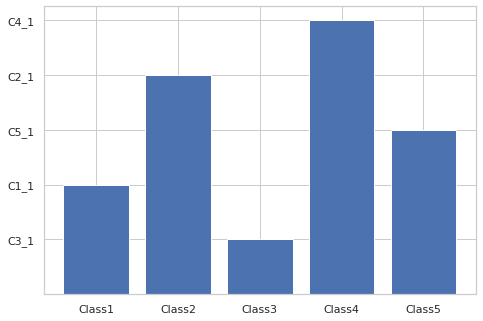

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# ax.grid(False)
Class = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5']
No_of_datapoints = [2,4,1,5,3]
labels = ['C1_1', 'C2_1', 'C3_1', 'C4_1', 'C5_1']
ax.bar(Class,No_of_datapoints)
plt.yticks(No_of_datapoints, labels)
plt.show()

In [32]:
sqrt(5/20)

0.5